# Read Data and Split

In [1]:
# Load all helper function
%run -i 'source.py'

dataset = pd.read_feather("../processing/train_with_feature.feather")
X = dataset[numc_features + ohe_features + te_features]
y = dataset['is_attributed']

**Since the dataset is too big, we use only 500,000 rows to train and test our model.**

In [2]:
X, _,y,_ = train_test_split(X,y,random_state=4995,train_size=.0081,stratify=y)
print(len(X))

505123


**Every model we create uses the same development-test split.**

In [3]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=4995, test_size=0.2, stratify=y)

In [4]:
print(f'Proportion of data in development set: {len(X_dev)/len(X):0.2f}')
print('Confirm we have a stratified split. 0 represents negative (no download); 1 represents positive (yes download)')
print(f'Proportion of positives in entire data set: {np.mean(y):0.5f}')
print(f'Proportion of positives in development set: {np.mean(y_dev):0.5f}')
print(f'Proportion of positives in test set: {np.mean(y_test):0.5f}')

Proportion of data in development set: 0.80
Confirm we have a stratified split. 0 represents negative (no download); 1 represents positive (yes download)
Proportion of positives in entire data set: 0.00243
Proportion of positives in development set: 0.00243
Proportion of positives in test set: 0.00243


# Preprocessing

No scaling required for Dummy Classifier.

# Build Dummy Classifier (Always Predict the Majority Class)

In [5]:
dc = DummyClassifier()
dc.fit(X_dev,y_dev)

DummyClassifier()

In [6]:
dc_predictions = dc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test,dc_predictions)}')
print(f'Recall: {recall_score(y_test,dc_predictions)}')
print(f'Precision: {precision_score(y_test,dc_predictions)}')
print(f'F-1 Score: {f1_score(y_test,dc_predictions)}')

precision, recall = precision_score(y_test,dc_predictions), recall_score(y_test,dc_predictions)

Accuracy: 0.997574857708488
Recall: 0.0
Precision: 0.0
F-1 Score: 0.0


/root/miniconda3/envs/myconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/miniconda3/envs/myconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Take a look at the Precision-Recall Curve**

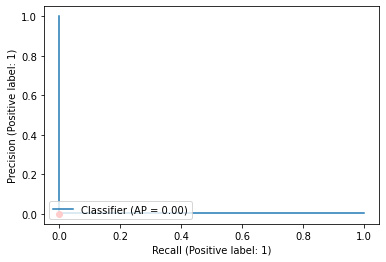

In [7]:
dc_prob_pred = dc.predict_proba(X_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test, dc_prob_pred)
plt.plot(recall,precision,'ro');

**Clearly, the model is performing very poorly. This is unsurprising.**

# Building a "Informed Dummy Classifier".

**If the download rate for a particular IP is greater than .8, we predict there will be a download. Otherwise, we predict the majority class (no download)**

In [8]:
def InformedDummyClassifier(X_test,y_test):
    predictions = []
    for i in range(0,len(X_test)):
        if X_test.iloc[i].download_rate_by_ip>.8:
            predictions.append(1)
        else:
            predictions.append(0)
            
    from sklearn.metrics import recall_score
    recall = recall_score(y_test,predictions)
    from sklearn.metrics import precision_score
    precision = precision_score(y_test,predictions)
    
    print(f"We achieve a recall of {recall:0.2f}")
    print(f"We achieve a precision of {precision:0.2f}")
    print(f'This an F-1 Score of {(2*recall*precision)/(recall + precision):0.2f}')

In [9]:
InformedDummyClassifier(X_test,y_test)

We achieve a recall of 0.10
We achieve a precision of 1.00
This an F-1 Score of 0.19


**Clearly, the informed dummy classifier performs better than the true dummy classifier, but the recall is still extremely low.**